# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [5]:
# read the data
import io
df = pd.read_csv('foodhub_order.csv')
# Dataset is now stored in a Pandas Dataframe
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

*   The DataFrame has 9 columns as mentioned in the Data Dictionary.

*   Data in each row corresponds to the order placed by a customer.

*   The *order_id* column contains the unique order id for each
order of the customer.

*  The *customer_id* column contains id number for each customer who ordered food.


*  The *restaurant_name* column contains names of the restaurant where the food is ordered.

*  The *day_of_the_week* column indicates whether the order is placed on weekdays or weekend.

*  The *cusine_type* column contain the names of the cusine ordered by customer.

*   Food_preparion_time and delivery_time are given in minutes.

*   Food_preparion_time and delivery_time are given in minutes.









### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# returns the number of rows by the number of columns
df.shape

(1898, 9)

#### Observations:


*   The dataset has 1898 rows and 9 columns.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



#### Observations:



*  There are 5 numerical columns, 4 object type colums in the data.
*   All columns have 1898 observations which represent that there is no missing value with in the data.
*   The rating column is being read as an "object" data type which should be numerical.
*   The restaurant_name, cuisine_type and day_of_the_week columns are of object type while other colums are numerical.
*   The object columns contain categorical data.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# check missing values across each columns
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no any missing value in data.

In [9]:
# see why the data type of rating column has object data type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [10]:
# check number of different types in rating column
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [11]:
# check the count of different data types in rating column
df['rating'].apply(type).value_counts()

rating
<class 'str'>    1898
Name: count, dtype: int64

Observations:

There are 736 'Not given' string data type in rating column.


Lets replace these values by null values.

In [12]:
# replace 'Not given' values by nan
df['rating']=df['rating'].replace(['Not given'],np.nan)
# change data type to numeric
df['rating']=df['rating'].astype(float)

In [13]:
# lets check the data type of the columns again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


Now, the data type in 'rating' column changed to numeric.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [14]:
# check statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
rating,1162.000,4.344,0.741,3.000,4.000,5.000,5.000,5.000
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:


* cost_of_the_order: The average cost for the orders is \$16.499 where minimum
value is \$4.470 and maximum value is  $35.410.

75% of the orders cost less than $ 22.297. There is a wide range for the cost of the orders from 4 to 35 that indicates there might be outliers present in this column.


*  rating: The average of ratings is 4.34 over 5. More than 50% of the customers rated 5. The minimum value for rating is 3.

*  food_preparation_time:  For food to be prepared once an order is placed, Minimum time taken is 20 min, average time taken is 27.37 min, and maximum time taken is 35 min.

*  delivery_time: Average delivery time is 24.162 min.75% of the orders take more than 20 min to deliver.

*  Although, data type of 'order_id' and 'customer_id' are numerical, we can assume them as categorical data due to their definition and nature. Therefore, statistical summary for these columns do not give us valuable insights.





### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
# find NaN values in 'rating' column
df['rating'].isna().sum()

736

#### Observations:
There are 736 orders out of 1898 that are not rated. Almost 39% of the customers did not rate their experience. This information suggest that our analysis related to rating might not be highly accurate, considering pretty a large valume of the customer have not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Lets check the distribution for columns that has numerical data first!

**Observations on Cost of the Order**

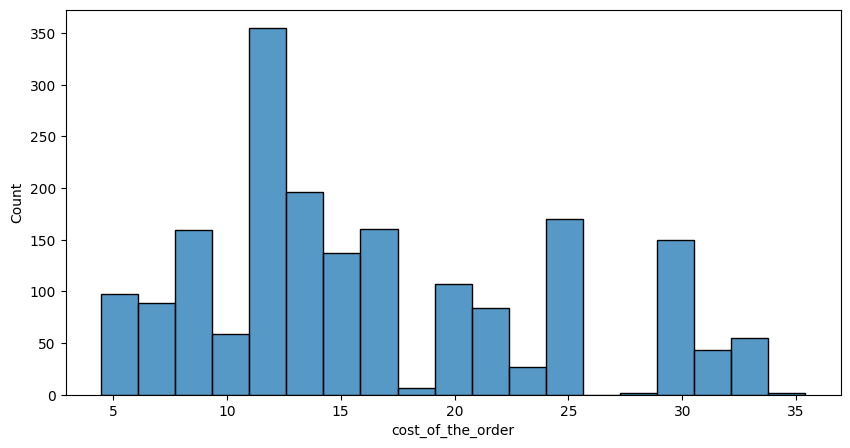

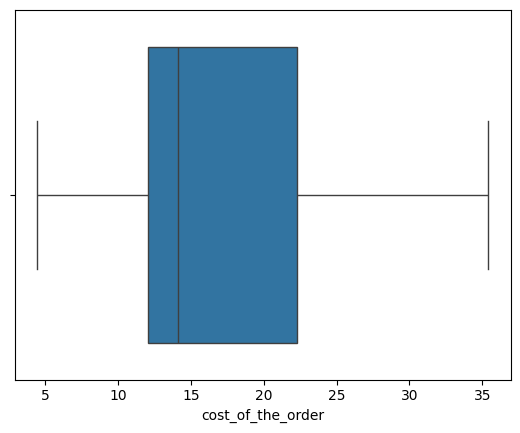

In [16]:
plt.figure(figsize = (10,5))
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

In [17]:
# lets find the mode
df['cost_of_the_order'].mode()

0   12.180
Name: cost_of_the_order, dtype: float64

Observations:

*  The distribution is skewed towards right.

*  There are no outliers.

*  The most common cost customers paid is around $12.

*  At least 50% of the customers ordered food that cost less than $15.



**Observations on Ratings**

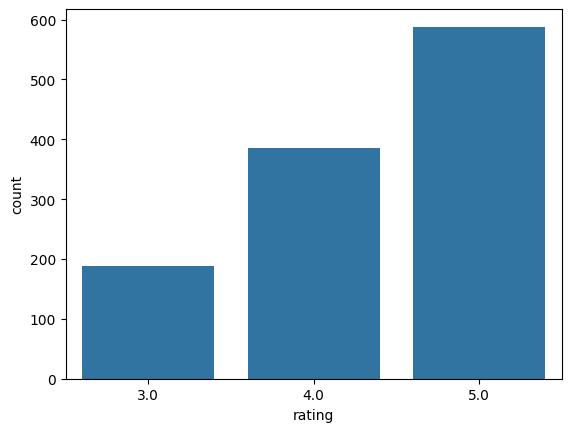

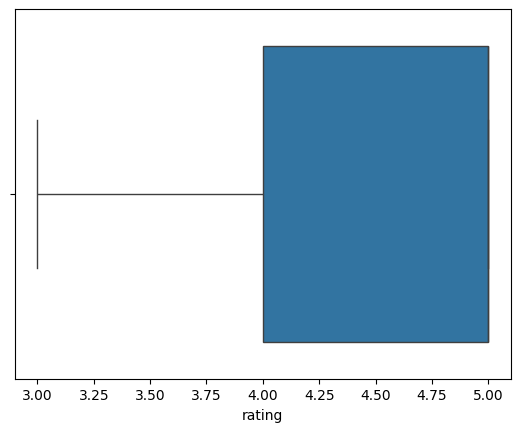

In [18]:
sns.countplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()

Observations:


*   The distribution skewed to the left.

*   The rating most given is 5 over 5.

*   At least, 75% of the customers, who rated, rated 4 and 5.


*   There are no customers who rated less than 3 over 5.







**Observation on Food Preparation Time**

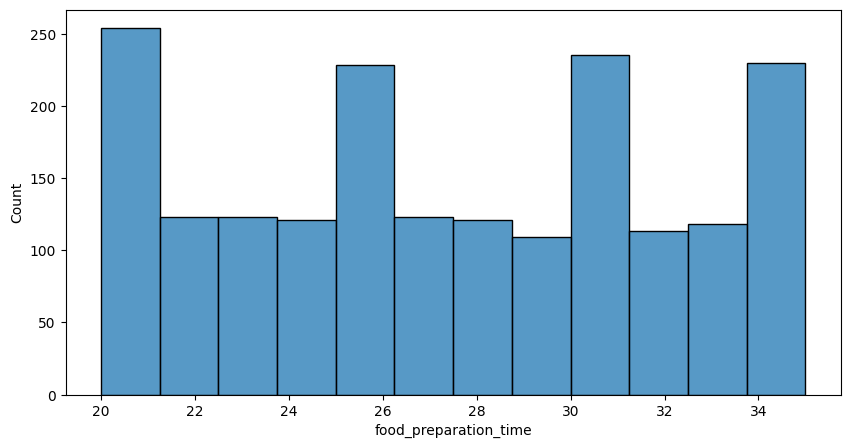

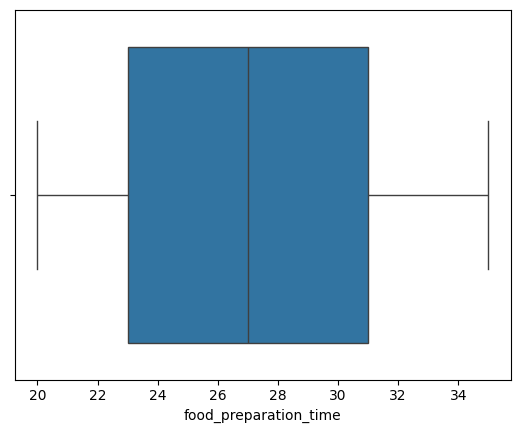

In [19]:
plt.figure(figsize = (10,5))
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Observations:


*   50% of the orders took at least 27 min to be prepared.
*   The distribution is neither left nor right skewed.

*   There are 4 different times that occur most among food preparation times.
*   That might be because of different cuisines ordered and the time taken for each type.





**Observation on Delivery Time**

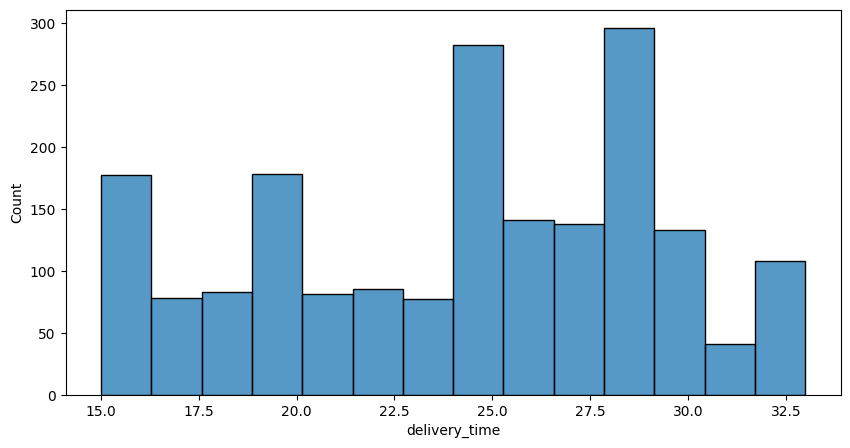

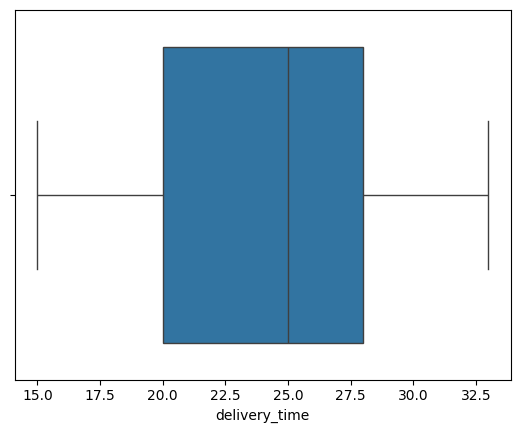

In [20]:
plt.figure(figsize = (10,5))
sns.histplot(data=df,x='delivery_time')
plt.show()

sns.boxplot(data=df,x='delivery_time')
plt.show()

Observations:

*   The distribution is slightly skewed to the left.
*   50% of the orders delivered within 25 minutes.
*   Other 50% of the orders delivered between 25 and 33 minutes.






Now, lets check the distribution for other columns.

**Observation on Order ID**

In [21]:

# check unique order ID
df['order_id'].nunique()

1898

There are 1898 unique order IDs in order_id column.

**Observation on Customer ID**

In [22]:
# check unique customer ID
df['customer_id'].nunique()

1200



*  There are 1200 unique customer IDs in customer_id column.
*  1200 unique customers used the app to order the food.

**Observation on Restaurant Name**

In [23]:
# check unique restaurant name
df['restaurant_name'].nunique()

178



*   There are 178 unique restaurant names in restaurant_name column.

*   Customers ordered food from 178 different restaurants by using the app.










**Observation on Cuisine Type**

In [24]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14



*  There are 14 unique cuisine types in cuisine_type column.

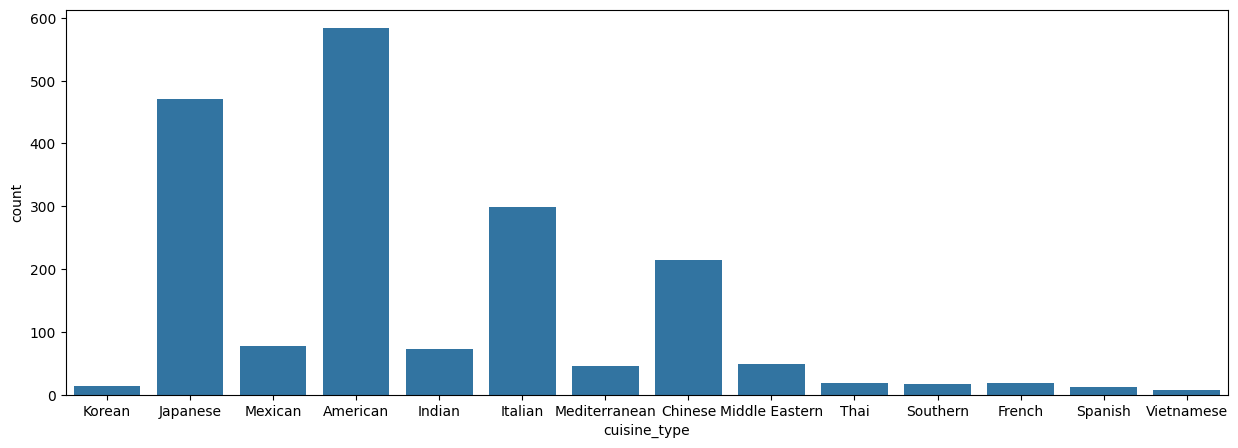

In [25]:
# let's plot box plot for cuisine types.
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.show()

Observations:

*   The most favorite (ordered) cuisine is "American" followed by "Japanese" and "Italian".

**Observation on Days of the Week.**

In [26]:
# check the unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [27]:
# check the unique values
df['day_of_the_week'].nunique()

2

There are two unique values in day_of_the_week column that are 'Weekend' and 'Weekday'.

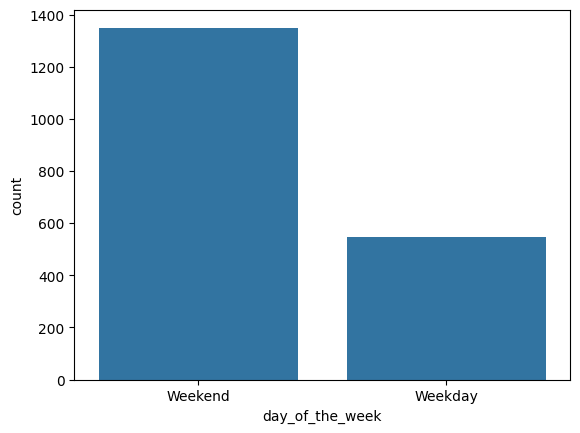

In [28]:
# plot box plot for days of the week
sns.countplot(data = df, x = 'day_of_the_week')
plt.show()



*  Mostly, orders are given on weekend days.


* Number of the orders given on weekend is significantly higher than the number
of the orders given on weekdays.

In [29]:
# find number of the orders given on weekend
df.loc[df['day_of_the_week']=='Weekend'].shape

(1351, 9)



* 1351 out of 1898 orders are given on weekend.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [30]:
# Group by 'restaurant_name' and count the number of occurrences
restaurant_counts = df['restaurant_name'].value_counts()

# Sort the restaurant counts in descending order and select the top 5
top_restaurants = restaurant_counts.head(5)


In [31]:
# Print the top 5 restaurants and their corresponding order counts
print("Top 5 restaurants in terms of number of orders:")
for restaurant, count in top_restaurants.items():
    print(f"{restaurant}: {count} orders")


Top 5 restaurants in terms of number of orders:
Shake Shack: 219 orders
The Meatball Shop: 132 orders
Blue Ribbon Sushi: 119 orders
Blue Ribbon Fried Chicken: 96 orders
Parm: 68 orders


#### Observations:

*   Names of the first five restaurants, with respect to the number of the orders they received, are Shake Shack (219 orders), The Meatball Shop (132 orders), Blue Ribbon Sushi (119 orders), Blue Ribbon Fried Chicken (96 orders) and Parm (68 orders)

*  The top restaurant's order number is 219 followed by 132, 119, 96 and 6
which are not very high when we compare with total number of the orders that is 1898 .
This information reveal that customers ordered from large range of the restaurants.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [32]:
# Find most popular cuisine on weekends
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(3)

cuisine_type
American    415
Japanese    335
Italian     207
Name: count, dtype: int64

#### Observations:
Most popular cuisine on weekends is 'American' cuisine, followed by Japanese and Italian cuisines.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [33]:


# Calculate the total number of orders
total_orders = len(df)

# Calculate the number of orders that cost more than 20 dollars
orders_above_20 = len(df[df['cost_of_the_order'] > 20])

# Calculate the percentage of orders that cost more than 20 dollars
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Print the percentage of orders that cost more than 20 dollars
print("The percentage of orders that cost more than $20 is", round(percentage_above_20,2), "%.")


The percentage of orders that cost more than $20 is 29.24 %.


#### Observations:
Only about 30% of the orders cost more than 20 dollars.
That means majority of the orders, about 70% , cost less than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [34]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print('The mean order delivery time is', round(mean_delivery_time, 2), 'minutes.')

The mean order delivery time is 24.16 minutes.


#### Observations:
The average delivery time for orders is about 24 min.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [35]:

# Group the dataframe by 'customer_id' and count the number of orders for each customer
customer_order_counts = df['customer_id'].value_counts()

# Select the top 3 customers with the highest order counts
top_customers = customer_order_counts.head(3)

# Print the IDs of the top 3 customers and their corresponding order counts
print("Top 3 most frequent customers:")
for customer_id, order_count in top_customers.items():
    print("Customer ID:", customer_id,"," ,"Order Count:", order_count)


Top 3 most frequent customers:
Customer ID: 52832 , Order Count: 13
Customer ID: 47440 , Order Count: 10
Customer ID: 83287 , Order Count: 9


#### Observations:


*   Order counts for customers who earned 20% discount voucher are 13,10 and 9 in order. These numbers are not very high when we compare with the total number of the orders given. We need more information about in which time interval the data was collected.


*   The frequency of using the app by customers can be increased by other promotions. For example; giving voucher to customers who has highest 5 (or 10) order number or whose total cost of orders is higher than 50 dollars.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]










**Relationship between Cuisine Type and Cost of the Order**







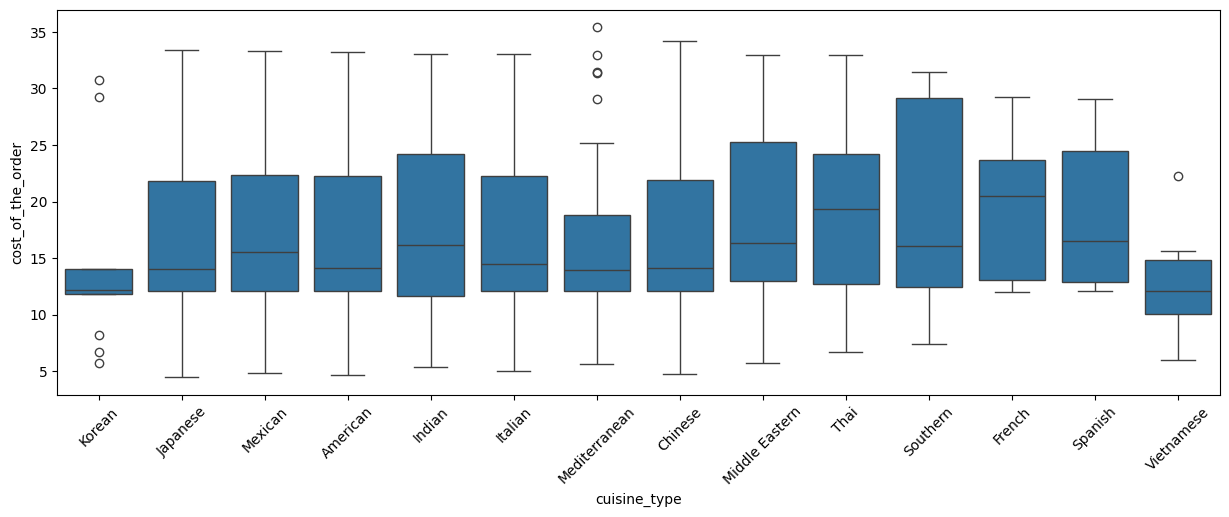

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 45)
plt.show()

Observations:

*   French cuisine has the highest median cost ( 20 dollars) for the orders.
The cost range for Southern cuisine is larger than others.

*  The cost range for Southern cuisine is larger than others.

*  Although median cost for Mediterranean cuisine is not high, there are some foods that has the highest cost.


**Relationship between Cuisine Type and Food Preparation Time**


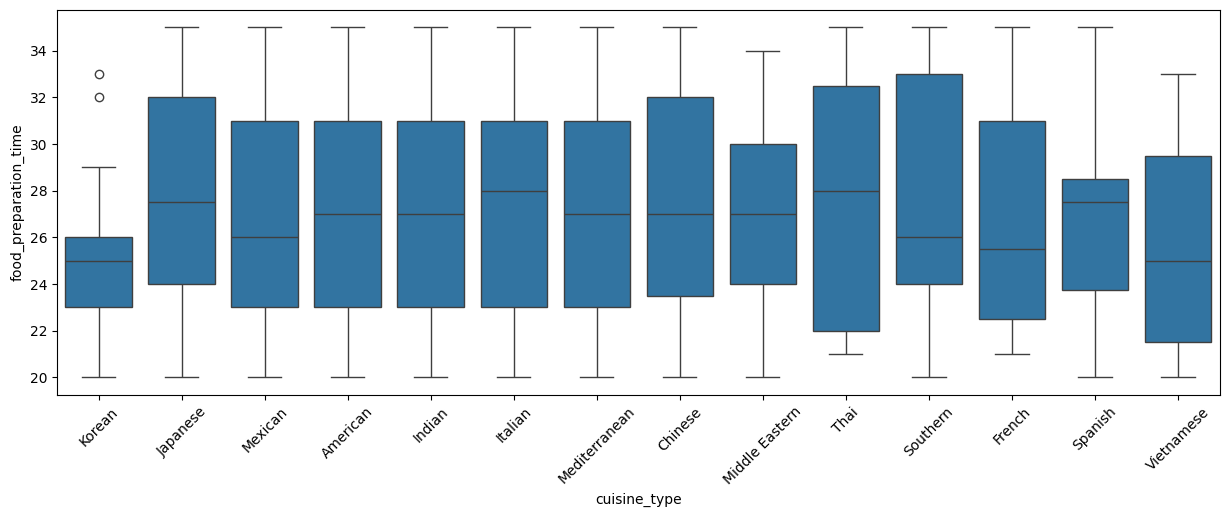

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x = "cuisine_type", y = "food_preparation_time")
plt.xticks(rotation = 45)
plt.show()

Observations:


*   Although for some cuisines such as Thai, median food preparation time is slightly higher, median food preparation time for  cuisines are close to each other. That suggests type of the cuisine do not play a crucial role on the time taken to prepare the food ordered.

**Relation between Day of the Week and Delivery Time**

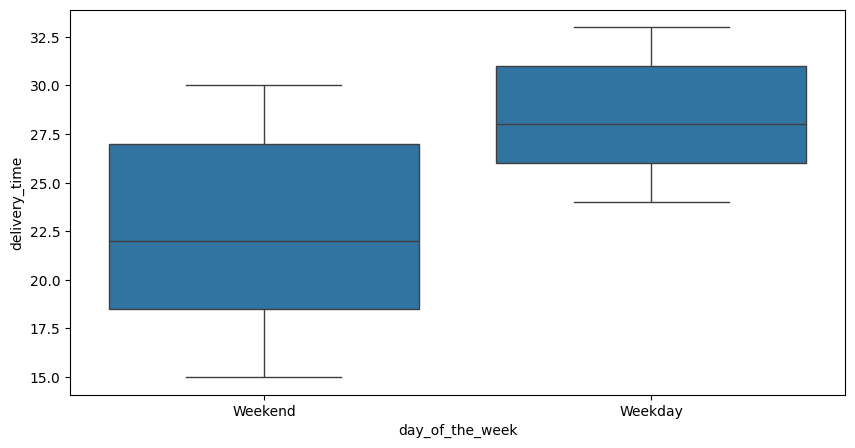

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x = "day_of_the_week", y = "delivery_time")
plt.show()

Observations:


*   Median delivery time on weekdays (28 min) is higher than median delivery time on weekend (22 min).
On weekend, ordered food is delivered faster than the weekdays.

**Relation between Rating and Delivery Time**

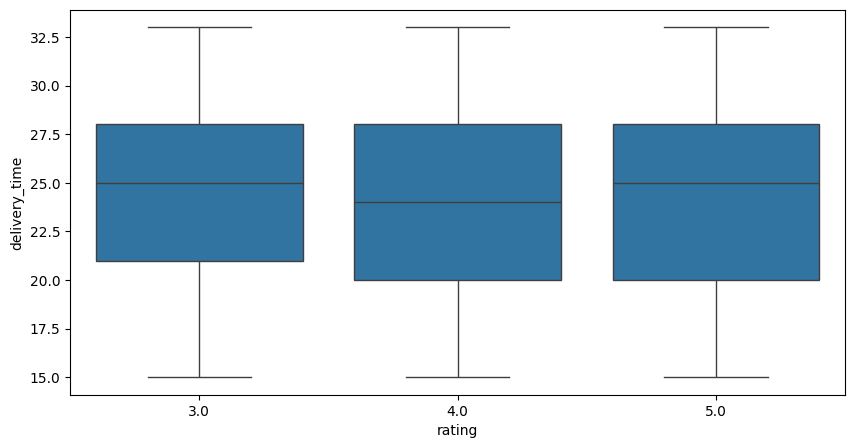

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x = 'rating', y = 'delivery_time')
plt.show()

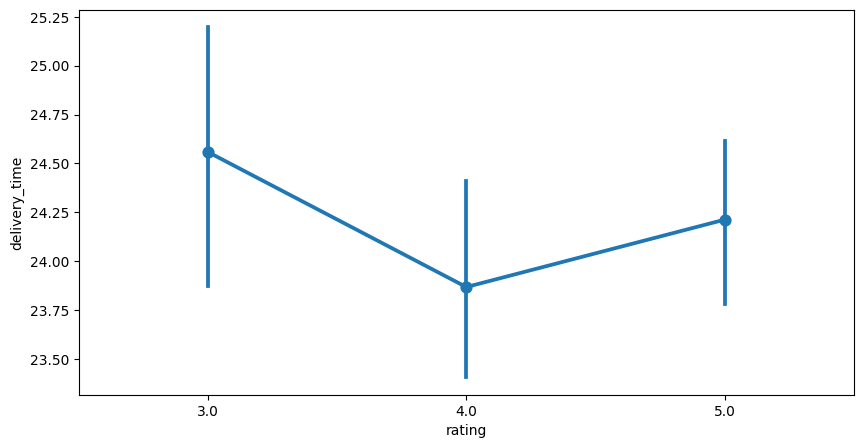

In [40]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x = 'rating', y = 'delivery_time')
plt.show()

*Observations*:


*   Median delivery time for orders received rating 4 is slightly lower than the median delivery time for orders who received 3 and 5.

*  Orders who received rating 3 had highest median delivery time.

*  However the difference is not so significant and we can conlude that there is no significant relationship seen between delivery time and ratings.

**Relationship between Rating and Food Preparation Time**

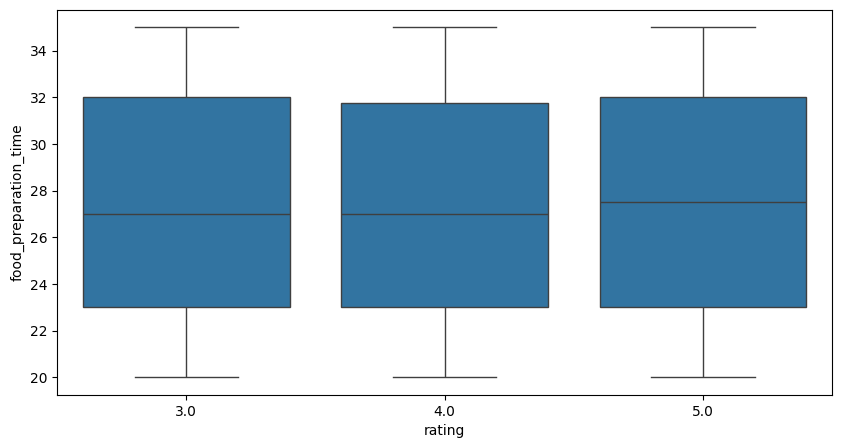

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x = 'rating', y = 'food_preparation_time')
plt.show()


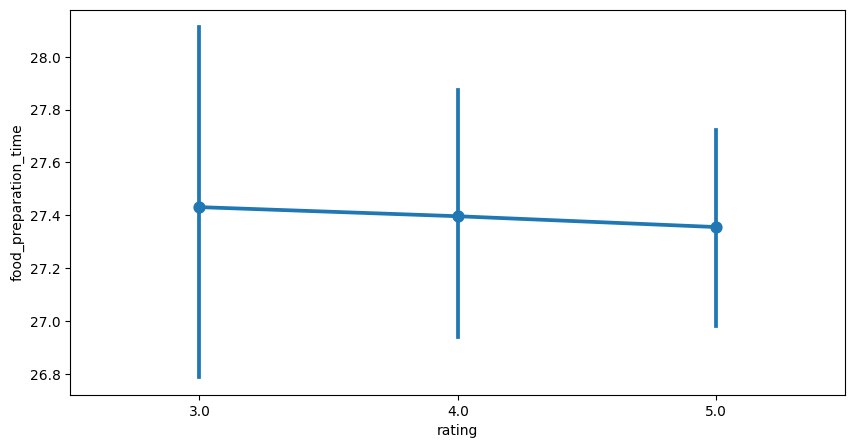

In [42]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x = 'rating', y = 'food_preparation_time')
plt.show()

Observations:


* There is no significant relation seen between food preparation time and the rating received based on the plots above.  
  



**Relation between Rating and Cost of the Order**

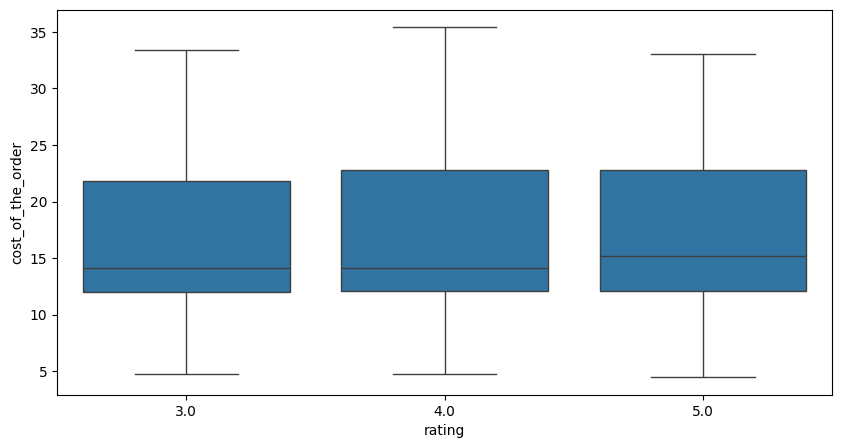

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x = 'rating', y = 'cost_of_the_order')
plt.show()

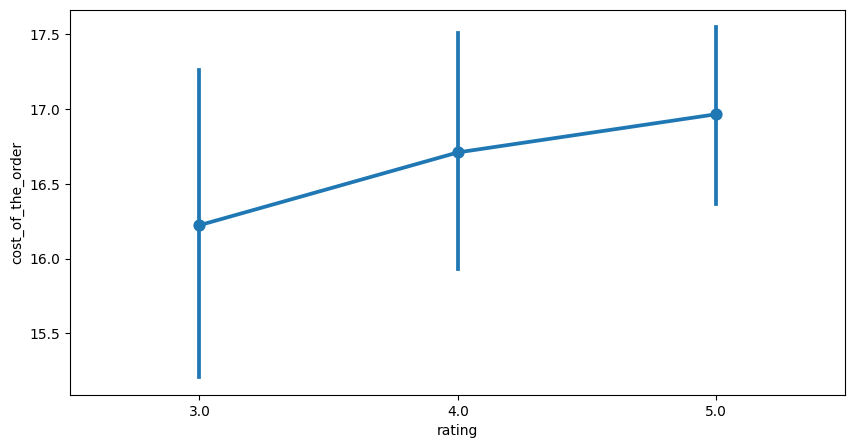

In [44]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x = 'rating', y = 'cost_of_the_order')
plt.show()

Observations:

*   As cost of the order increased, the rating given for the order increased.

*   Central tendecy of cost of the orders recived rating 5 is higher than the central tendecy of cost of the orders recived rating 4 and 3. Similar relation exists between orders received rating 4 and 3.




In [45]:
# Lets find the revenue generated by restaurants and list 20 of them in descending order.
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                             3579.530
The Meatball Shop                       2145.210
Blue Ribbon Sushi                       1903.950
Blue Ribbon Fried Chicken               1662.290
Parm                                    1112.760
RedFarm Broadway                         965.130
RedFarm Hudson                           921.210
TAO                                      834.500
Han Dynasty                              755.290
Blue Ribbon Sushi Bar & Grill            666.620
Rubirosa                                 660.450
Sushi of Gari 46                         640.870
Nobu Next Door                           623.670
Five Guys Burgers and Fries              506.470
Momoya                                   492.130
Chipotle Mexican Grill $1.99 Delivery    491.690
Blue Ribbon Sushi Izakaya                485.090
Tamarind TriBeCa                         426.710
Jack's Wife Freda                        416.750
Bareburger                               399.740
Name

Observations:

* The restaurant Shake Shack has the largest revenue.

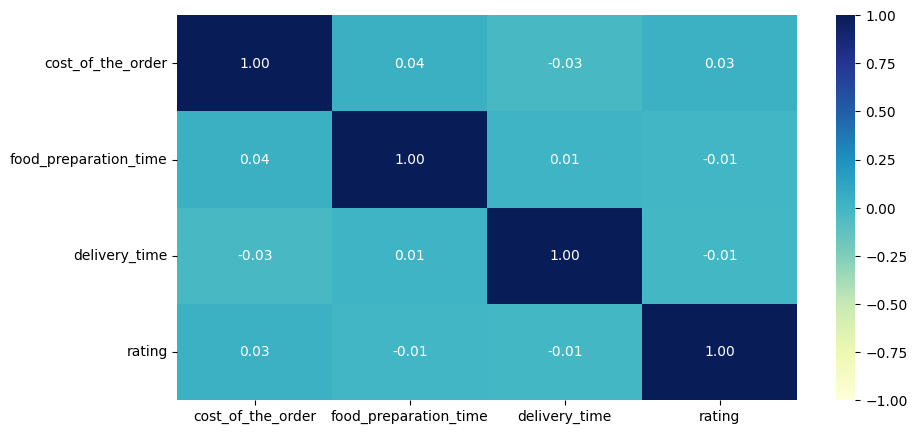

In [46]:
# Plot the heatmap
numerical_variables = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
plt.figure(figsize=(10, 5))
sns.heatmap(data=df[numerical_variables].corr(), annot=True, vmin=-1, vmax=1,fmt=".2f", cmap="YlGnBu")
plt.show()

Observations:

*   There is no any strong positive or negative correlation between variables.

*  Food preparation time and cost of the order have highest (weak) positive correlation (0.04) as expected.

*  Rating and cost of the order also have weak positive correlation (0.03) while delivery time and cost of the order have weak negative correlation (-0.03).

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [47]:

# Create a dataframe that contain the restaurant names with their rating count
rating_count=df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
# Converte the 'rating' column to numeric
rating_count['rating'] = pd.to_numeric(rating_count['rating'])
# Rename the 'rating' column as Rating _Counts
rating_count.rename(columns={'rating':'Rating_Counts'}, inplace=True)
print(rating_count)


               restaurant_name  Rating_Counts
0                  Shake Shack            133
1            The Meatball Shop             84
2            Blue Ribbon Sushi             73
3    Blue Ribbon Fried Chicken             64
4             RedFarm Broadway             41
..                         ...            ...
173               Market Table              0
174             Paul & Jimmy's              0
175               Room Service              0
176                  Rohm Thai              0
177              Lamarca Pasta              0

[178 rows x 2 columns]


In [48]:
# Create a dataframe that contain the restaurant names and their average rating
average_rating=df.groupby(['restaurant_name'])['rating'].mean().dropna().sort_values(ascending=False).reset_index()
# Rename the 'rating' column as Average_Rating
average_rating.rename(columns={'rating':'Average_Rating'}, inplace=True)
print(average_rating)

                   restaurant_name  Average_Rating
0                       'wichcraft           5.000
1             Ravagh Persian Grill           5.000
2    Chola Eclectic Indian Cuisine           5.000
3                      Chote Nawab           5.000
4                           Junoon           5.000
..                             ...             ...
151                       Woorijip           3.000
152              Byblos Restaurant           3.000
153                    Pepe Giallo           3.000
154                   Sushi Choshi           3.000
155                Sarabeth's West           3.000

[156 rows x 2 columns]


In [49]:
# Merge the dataframes based on a common column 'restaurant_name'
merged_df = pd.merge(rating_count,average_rating, on='restaurant_name')

# Extract data based on conditions
promotional_restaurants = merged_df[(merged_df['Rating_Counts'] > 50) & (merged_df['Average_Rating'] >4)]

# Print the filtered dataframe
print(promotional_restaurants)

             restaurant_name  Rating_Counts  Average_Rating
0                Shake Shack            133           4.278
1          The Meatball Shop             84           4.512
2          Blue Ribbon Sushi             73           4.219
3  Blue Ribbon Fried Chicken             64           4.328


#### Observations:

*  There are four restaurants that met the criteria to get the promotional offer.
*  Names of these restaurants are Shake Shack, The Meatball Shop, Blue ribbon Sushi and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [50]:
# Calculate the revenue for orders with cost greater than $20
revenue_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# Calculate the revenue for orders with cost greater than $5 (excluding those greater than $20)
revenue_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

# Calculate the total net revenue generated
net_revenue = revenue_20 + revenue_5

# Print the net revenue
print("The net revenue generated by the company is $",round(net_revenue,2))


The net revenue generated by the company is $ 6166.3


#### Observations:


*  The net revenue generated by company is $ 6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [51]:
# Assuming your dataframe is named 'df' and contains a column 'delivery_time'
df['total_delivery_time']=df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes to deliver
percentage = (df[df['total_delivery_time'] > 60]['total_delivery_time'].count() / df['total_delivery_time'].count()) * 100

# Print the percentage
print("The percentage of orders taking more than 60 minutes to deliver is:", round(percentage,2),"%")

The percentage of orders taking more than 60 minutes to deliver is: 10.54 %


#### Observations:


*   10.54 % of the orders take more than 60 minutes to deliver.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [53]:
# Group the data by day of the week and calculate the mean delivery time
mean_delivery_time=df.groupby(['day_of_the_week'])['delivery_time'].mean().round()
# Print the mean delivery time for weekdays and weekends
print(mean_delivery_time)

day_of_the_week
Weekday   28.000
Weekend   22.000
Name: delivery_time, dtype: float64


#### Observations:

*   On average, delivering orders on weekdays take 6 min longer than delivering orders on weekend.


*   The average delivery time for orders on the weekday (28 min) is 6 min longer than average delivery time on weekend (22 min).




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Customers have a higher preference for American cuisine compared to other cuisines.Understanding customer preferences for different cuisines can be valuable for the company as it helps them make informed decisions such as optimizing restaurant partnerships, enhancing menu offerings, and providing personalized recommendations to customers.

*   The number of orders given on weekends is significantly higher than the number of orders given on weekdays. This observation suggests a higher demand for food delivery or online orders during weekends compared to weekdays.
Understanding the variation in order volumes between weekdays and weekends can assist the company in several ways. It enables the company to allocate appropriate resources and staffing levels, optimize delivery logistics, and plan promotional offers or campaigns to maximize customer satisfaction and revenue during peak demand periods.

*   Customers have ordered from a wide range of restaurants. This suggests that the food aggregator platform has a diverse selection of restaurants available for customers to choose from, catering to various culinary preferences.
Having a large range of restaurants can be beneficial for the company, as it provides customers with a wide variety of options and increases customer satisfaction by offering a diverse dining experience.

*   As the cost of the order increased, the rating given for the order also increased. This indicates a positive relationship between the cost of the order and the rating received. Customers tend to give higher ratings to orders with higher costs, suggesting that they perceive higher-priced orders as having better quality or value.


### Recommendations:

*   Enhance Personalized Recommendations: Utilize the available customer data, including past orders and preferences, to develop a recommendation system that suggests relevant restaurants and cuisines to individual customers. This can improve customer experience and increase order frequency.

*   Collaborate with Popular Restaurants: Establish strong partnerships with popular restaurants with high order volumes that are 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi','Bule Ribbon Fried Chicken' and 'Parm' restaurants. This can include negotiating exclusive deals, offering promotions, and ensuring consistent quality of service from these key partners.

*   Customer Sentiment Analysis:  Analyze customer reviews and feedback. There is a need for more data to gain insights into customer sentiments, identify areas of improvement, and address any recurring issues to enhance overall customer satisfaction.

*   Loyalty and Referral Programs: Implement loyalty programs to reward frequent customers and referral programs to incentivize customers to refer others. This can help in customer retention, acquisition, and building a strong customer base.

*   Based on the observation that the number of orders given on weekends is significantly higher than the number of orders given on weekdays, I recommend the following actions to leverage this information:

    Resource Allocation and Staffing: Allocate resources and staffing levels accordingly to meet the increased demand during weekends. Ensure sufficient delivery personnel, customer support are available to handle the higher order volumes and deliver excellent service.

    Optimize Delivery Logistics: Analyze and optimize the delivery logistics to handle the peak demand on weekends. Consider implementing route optimization algorithms, real-time tracking systems, and efficient dispatching methods to ensure timely deliveries and enhance customer satisfaction.

    Promotional Campaigns and Offers: Leverage the higher demand on weekends by planning targeted promotional campaigns and offers. Use customer data and analytics to identify customer preferences, popular cuisines, and ordering patterns during weekends. Design attractive offers, discounts, or special menus to incentivize customers to place orders and increase revenue during these peak periods.

    Enhanced Customer Support: Increase customer support availability during weekends to address any queries, concerns, or issues promptly. Ensure customers can easily reach out for assistance through multiple channels such as phone, chat, or email. Quick and efficient resolution of customer inquiries contributes to a positive customer experience.

    Menu Optimization: American cuisine is the most favorite cuisine among the orders given on weekends. Highlight popular dishes, introduce limited-time specials, or collaborate with restaurants to offer exclusive weekend-only items from American cuisine. This can cater to customer preferences and further enhance the weekend ordering experience.

    Customer Communication: Proactively communicate with customers about any operational changes or updates during weekends. Keep customers informed about estimated delivery times, any delays, or promotions happening during peak periods. Transparent and timely communication helps manage customer expectations and maintains a positive brand image.

    Performance Monitoring and Analysis: Continuously monitor and analyze key performance indicators (KPIs) related to weekend orders. Track metrics such as order volume, delivery time, customer feedback, and revenue generated during weekends. This data-driven approach provides insights into the effectiveness of strategies and enables data-backed decision-making for continuous improvement.

*   Market Expansion Analysis: Utilize more data to identify potential areas for market expansion. Analyze customer demographics, preferences, and competition in new locations to make informed decisions on entering new markets.




---